In [133]:
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import numpy as np
import talib as talib
import pandas as pd
import datetime as dt

#取所有2n天内的低点
def get_low_point(df,columns,n):
    conds = (df[columns]==df[columns])
    for i in range(0,n):
        conds = conds & (df[columns].shift(i+1)>=df[columns]) &  (df[columns].shift(-i-1)>=df[columns])  
    return df[conds] 

#取所有2n天内的高点
def get_high_point(df,columns,n):
    conds = (df[columns]==df[columns])
    for i in range(0,n):
        conds = conds & (df[columns].shift(i+1)<=df[columns]) &  (df[columns].shift(-i-1)<=df[columns])  
    return df[conds]

data = ts.get_k_data('002023', ktype='w',autype="qfq",index=False,start='2001-01-01', end='2018-05-15')
#RSI
data["rsi"] = talib.RSI(data['close'].values, timeperiod=9)

In [148]:
#取底背离点
def get_low_beili(df,columns1, columns2):
    return df[ (df[columns1].shift(1)>df[columns1]) & (df[columns2].shift(1)<df[columns2])  ]

def get_high_beili(df,columns1, columns2):
    return df[ (df[columns1].shift(1)<df[columns1]) & (df[columns2].shift(1)>df[columns2])  ]

k_LowPoint= get_low_point(data,"low",3).dropna()
k_LowPoint= get_low_point(k_LowPoint,"low",1).dropna()
low_dest = get_low_beili(k_LowPoint,"low","rsi")

low_dest
k_LowPoint

,date,open,close,high,low,volume,code,rsi
77,2006-03-10,1.695,1.615,1.695,1.563,50039.67,002023,37.299675
112,2006-11-24,1.909,1.957,1.967,1.835,64567.18,002023,37.114505
159,2007-11-02,2.631,2.536,2.765,2.500,63430.30,002023,32.730455
211,2008-11-07,1.109,1.217,1.255,1.082,81674.53,002023,26.870523
248,2009-07-31,3.828,3.674,3.962,3.408,277487.16,002023,58.659644
289,2010-05-21,5.412,5.512,5.593,4.866,121941.90,002023,32.568152
325,2011-01-28,6.465,6.772,6.934,6.096,112022.00,002023,38.459681
346,2011-06-24,7.701,7.662,7.748,6.652,199927.00,002023,52.067514
375,2012-01-20,3.879,3.759,3.879,3.419,175815.00,002023,16.462907
402,2012-08-03,3.977,3.953,3.977,3.749,52002.00,002023,30.899197


In [149]:
k_heightPoint= get_high_point(data,"high",3).dropna()
high_dest = get_high_beili(k_heightPoint,"high","rsi")
high_dest

,date,open,close,high,low,volume,code,rsi
121,2007-01-26,2.609,2.374,2.754,2.228,146375.58,002023,59.072358
138,2007-06-01,3.996,3.417,4.300,3.417,205270.68,002023,59.116242
181,2008-04-03,3.644,2.892,3.644,2.608,168486.64,002023,42.846111
273,2010-01-22,6.873,6.261,6.996,6.127,241764.36,002023,58.825749
314,2010-11-12,9.123,8.831,9.951,8.668,602638.00,002023,64.460076
464,2013-10-25,8.240,7.465,8.583,7.347,229018.00,002023,59.361394
481,2014-02-21,8.917,8.701,9.539,8.608,400827.00,002023,60.963238


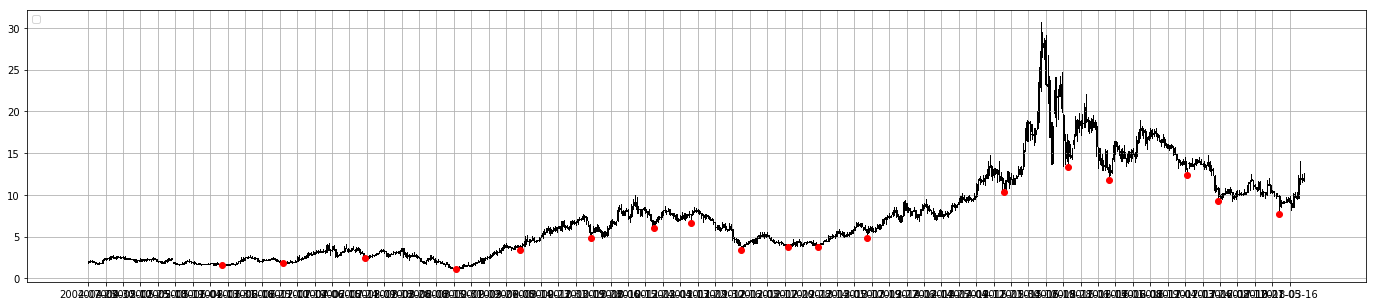

In [ ]:
 #绘制K线图
 
fig = plt.figure(figsize=(24, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(data['date']), 10))
ax.set_xticklabels(data['date'][::10])
ax.legend(loc='upper left')

mpf.candlestick2_ochl(ax, data['open'], data['close'], data['high'], data['low'],width=0.5, colorup='r', colordown='green',alpha=0.6)
plt.grid()
#画出低点
plt.plot(k_LowPoint.index, k_LowPoint["low"],'o',color='red')

#绘制RSI线图
fig2 = plt.figure(figsize=(24,3)) 
ax2 = fig2.add_subplot(1, 1, 1)
#设置坐标轴范围
plt.xlabel('time')
plt.ylabel('rsi')
ax2.set_xticks(range(0, len(data['date']), 10))
ax2.set_xticklabels(data['date'][::10]) 
ax2.legend(loc='upper left')
#设置坐标轴范围
#plt.xlim((-5, 5))
plt.ylim((0, 100))
plt.grid()
plt.plot(data["date"],data["rsi"],color='red', linewidth=1.0, linestyle='-')
plt.axhline(80,alpha=0.5,color='red',linestyle='--') 
plt.axhline(50,alpha=0.5,color='red',linestyle='--') 
plt.axhline(20,alpha=0.5,color='red',linestyle='--') 

#画出底背离低点
plt.plot(low_dest.index, low_dest["rsi"],'o',color='red') 
#plt.arrow(0, 0,  50,  50, head_width=0.5, head_length=0.1, fc='k', ec='k')